In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("ratings.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

print(f'\nКоличество дубликатов строк: {df.duplicated().sum()}\n')
df.info()


Количество дубликатов строк: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [86]:
df[['rating', 'timestamp']].describe()

,rating,timestamp
count,100836.000000,100836
mean,3.501557,2008-03-19 17:01:27.368469248
min,0.500000,1996-03-29 18:36:55
25%,3.000000,2002-04-18 09:57:46
50%,3.500000,2007-08-02 20:31:02
75%,4.000000,2015-07-04 07:15:44.500000
max,5.000000,2018-09-24 14:27:30
std,1.042529,NaN


Длина истории пользователей

Минимум: 20
Максимум: 2698
Среднее: 165.30491803278687
Медиана: 70.5
Дисперсия: 72619.7853616517


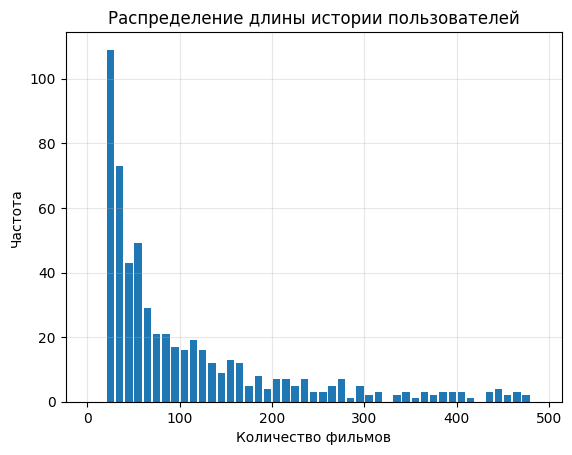

In [87]:
user_history = df.groupby("userId")["movieId"].count()

print("Минимум:", user_history.min())
print("Максимум:", user_history.max())
print("Среднее:", user_history.mean())
print("Медиана:", user_history.median())
print("Дисперсия:", user_history.var())

bins  = np.arange(0, 500, 10)
plt.figure()
plt.hist(user_history, bins=bins, rwidth=0.8)
plt.title("Распределение длины истории пользователей")
plt.xlabel("Количество фильмов")
plt.ylabel("Частота")
plt.grid(True, alpha=0.3)
plt.show()

Пользователи, повторно оценившие фильм

In [88]:
df.duplicated(subset=["userId", "movieId"]).sum()

np.int64(0)

Распределение интеракций по годам

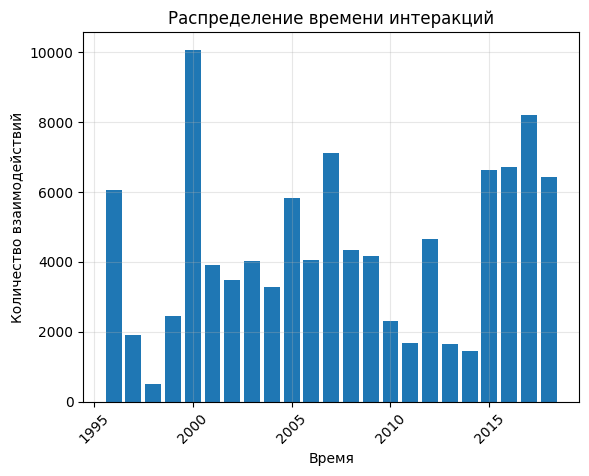

In [89]:
years = np.arange(1996, 2019, 1)

plt.figure()
plt.bar(years, df["timestamp"].groupby(df["timestamp"].dt.year).count())
plt.title("Распределение времени интеракций")
plt.xlabel("Время")
plt.ylabel("Количество взаимодействий")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

Статистика по рейтингам

Минимум: 0.5
Максимум: 5.0
Среднее: 3.501556983616962
Медиана: 3.5
Дисперсия: 1.08686721429614


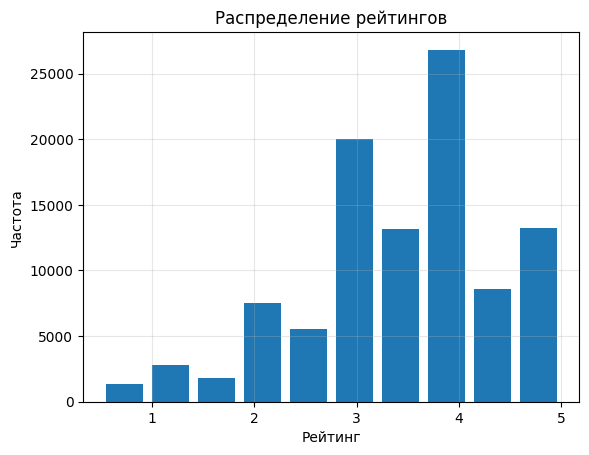

In [90]:
print("Минимум:", df["rating"].min())
print("Максимум:", df["rating"].max())
print("Среднее:", df["rating"].mean())
print("Медиана:", df["rating"].median())
print("Дисперсия:", df["rating"].var())

plt.figure()
plt.hist(df["rating"], bins=10, rwidth=0.8)
plt.title("Распределение рейтингов")
plt.xlabel("Рейтинг")
plt.ylabel("Частота")
plt.grid(True, alpha=0.3)
plt.show()

Статистика по промежуткам между интеракциями

Минимум в секундах: 0.0000
Максимум в днях: 2443.82
Среднее в днях: 1.43
Медиана в секундах: 11.00
CKO в днях: 24.23


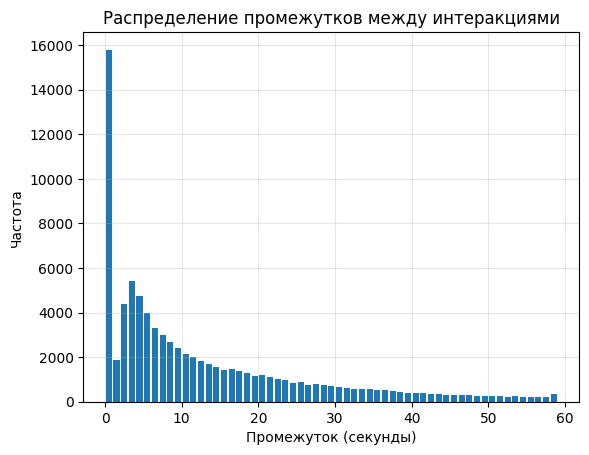

In [91]:
df_sorted = df.sort_values(["userId", "timestamp"])
df_sorted["time_diff_seconds"] = df_sorted.groupby("userId")["timestamp"].diff().dt.total_seconds()

print(f"Минимум в секундах: {df_sorted["time_diff_seconds"].min():.4f}")
print(f"Максимум в днях: {df_sorted["time_diff_seconds"].max()/3600/24:.2f}")
print(f"Среднее в днях: {df_sorted["time_diff_seconds"].mean()/3600/24:.2f}")
print(f"Медиана в секундах: {df_sorted["time_diff_seconds"].median():.2f}")
print(f"CKO в днях: {np.sqrt(df_sorted["time_diff_seconds"].var())/3600/24:.2f}")

bins = np.arange(0, 60, 1)
plt.figure()
plt.hist(df_sorted["time_diff_seconds"], bins=bins, rwidth=0.8)
plt.title("Распределение промежутков между интеракциями")
plt.xlabel("Промежуток (секунды)")
plt.ylabel("Частота")
plt.grid(True, alpha=0.3)
plt.show()

Средние промежутки между интеракциями

Минимум в секундах: 1.73
Максимум в днях: 55.57
Среднее в днях: 1.10
Медиана в секундах: 61.09


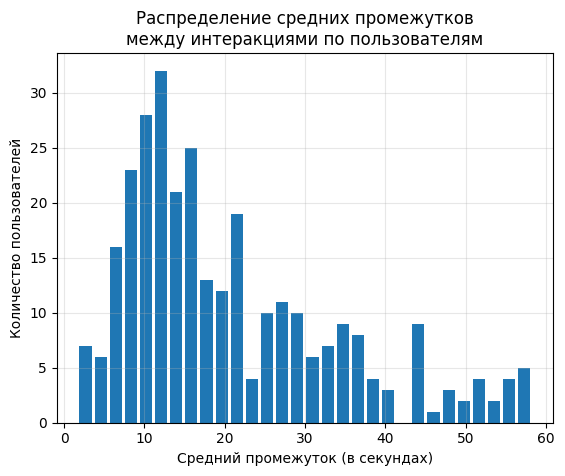

In [92]:
user_avg_gap = df_sorted.groupby("userId")["time_diff_seconds"].mean().dropna()

print(f"Минимум в секундах: {user_avg_gap.min():.2f}")
print(f"Максимум в днях: {user_avg_gap.max()/24/3600:.2f}")
print(f"Среднее в днях: {user_avg_gap.mean()/24/3600:.2f}")
print(f"Медиана в секундах: {user_avg_gap.median():.2f}")

plt.hist(user_avg_gap[user_avg_gap < 60], bins=30, rwidth=0.8)
plt.title("Распределение средних промежутков\nмежду интеракциями по пользователям")
plt.xlabel("Средний промежуток (в секундах)")
plt.ylabel("Количество пользователей")
plt.grid(True, alpha=0.3)

Средние рейтинги с агрегацией по пользователям

Минимум: 1.275
Максимум: 5.000
Среднее: 3.657
Медиана: 3.694
Дисперсия: 0.231


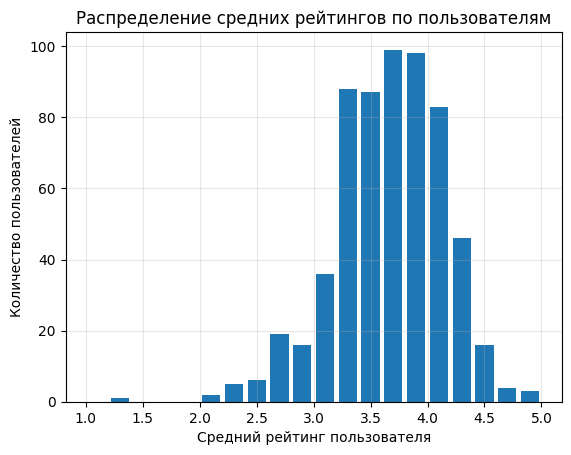

In [93]:
user_avg_rating = df.groupby("userId")["rating"].mean()

print(f"Минимум: {user_avg_rating.min():.3f}")
print(f"Максимум: {user_avg_rating.max():.3f}")
print(f"Среднее: {user_avg_rating.mean():.3f}")
print(f"Медиана: {user_avg_rating.median():.3f}")
print(f"Дисперсия: {user_avg_rating.var():.3f}")

bins = np.arange(1, 5.1, 0.2)
plt.hist(user_avg_rating, bins=bins, rwidth=0.8)
plt.title("Распределение средних рейтингов по пользователям")
plt.xlabel("Средний рейтинг пользователя")
plt.ylabel("Количество пользователей")
plt.xticks(np.arange(1, 5.1, 0.5))
plt.grid(True, alpha=0.3)